# Lab 3

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as lb
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as DTR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
import math
from sklearn.linear_model import LogisticRegression as LR
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from sklearn import naive_bayes as nb;
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

## Problem 1

### 1. Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also identify the useful columns and drop the unnecessary ones

In [128]:
titan = pd.read_csv("/content/drive/MyDrive/PRML/Lab3/titanic.csv")
titanic_dataset = pd.DataFrame(titan,columns = titan.columns)
 
titanic_dataset_new = titanic_dataset.copy()
titanic_dataset_new=titanic_dataset_new.drop(labels=["PassengerId","Name","Ticket","Cabin"],axis=1)
titanic_dataset_new

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


#### Preprocessing the dataset

In [150]:
X = titanic_dataset_new.copy()
lb_new = lb()
X = X.drop(X[(X["Age"] < 1)].index)
X =X.dropna()
X["Age"] = X["Age"].astype(int)
# X["Sex"] = lb.fit_transform(X["Sex"])
Y = X["Survived"]
# X = X.drop(labels = ["Survived"],axis = 1)

X["Sex"] = lb_new.fit_transform(X["Sex"])
X["Embarked"] = lb_new.fit_transform(X["Embarked"])

X = X.set_index(np.arange(len(X)))
X

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22,7.2500,2,0
1,1,0,38,71.2833,0,1
2,3,0,26,7.9250,2,1
3,1,0,35,53.1000,2,1
4,3,1,35,8.0500,2,0
...,...,...,...,...,...,...
700,3,0,39,29.1250,1,0
701,2,1,27,13.0000,2,0
702,1,0,19,30.0000,2,1
703,1,1,26,30.0000,0,1


#### Visualization of data


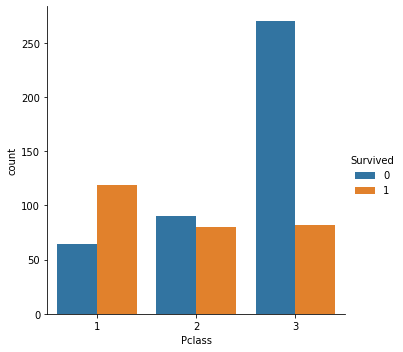

In [151]:
plt.rcParams['figure.figsize'] = [5,5]
s = sns.catplot(x="Pclass",hue="Survived",kind="count",data = X,legend=(True))

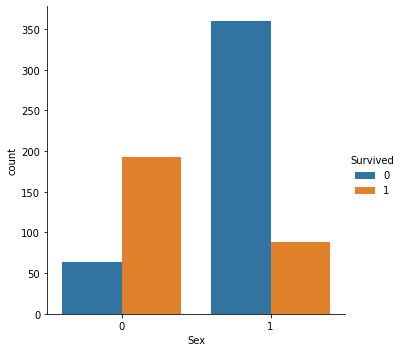

In [131]:
sns.catplot(x="Sex",hue="Survived",kind="count",data = X,legend=(True))

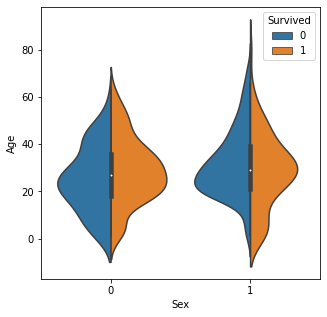

In [152]:
sns.violinplot(x="Sex",y = "Age",hue="Survived",data = X,split = True)

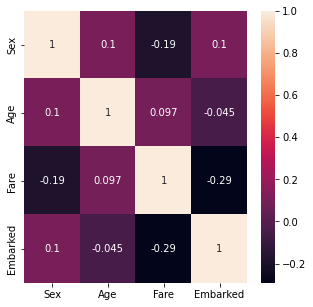

In [153]:
X = X.drop(["Survived","Pclass"],axis = 1)
sns.heatmap(data=X.corr(),annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


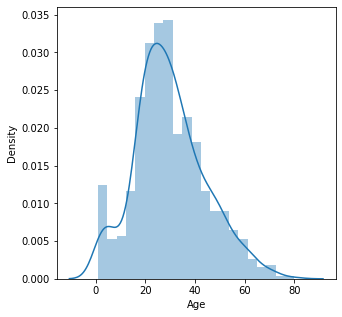

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


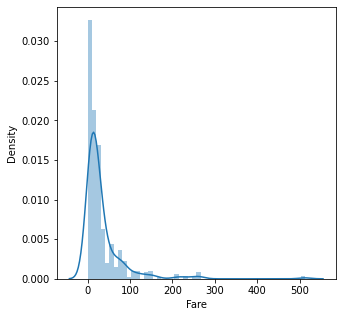

In [154]:
sns.distplot(X["Age"])
plt.show()
sns.distplot(X["Fare"])

#### Splitting of data

In [138]:
X_train,X_test,Y_train,Y_test= tts(X,Y,test_size = 0.2,shuffle=True)

### 2) Identify the best possible variant of naive bayes classifier for the given dataset. Justify your reason for the same


In [139]:
naivebayesvariant = [nb.GaussianNB,nb.CategoricalNB,nb.ComplementNB,nb.MultinomialNB,nb.BernoulliNB]
for i in naivebayesvariant:
  model = i()
  model.fit(X_train,Y_train)
  print(str(model),"-->",mse(Y_test,model.predict(X_test)))
model_gauss = nb.GaussianNB()
model_gauss.fit(X_train[["Age","Fare"]],Y_train)
model_cat = nb.CategoricalNB()
model_cat.fit(X_train[["Sex","Embarked"]],Y_train)
Y_gauss_probabilities = model_gauss.predict_proba(X_test[["Age","Fare"]])
Y_cat_probabilities = model_cat.predict_proba(X_test[["Sex","Embarked"]])
Y_final_prob = np.multiply(Y_gauss_probabilities,Y_cat_probabilities)
final_y=np.zeros(len(Y_final_prob))
for i in range(len(final_y)):
  if(Y_final_prob[i][1]>Y_final_prob[i][0]):
    final_y[i]=1
print("mse on combining categorical and gaussian",mse(final_y,Y_test))

GaussianNB() --> 0.15602836879432624
CategoricalNB() --> 0.2198581560283688
ComplementNB() --> 0.375886524822695
MultinomialNB() --> 0.36879432624113473
BernoulliNB() --> 0.15602836879432624
mse on combining categorical and gaussian 0.3120567375886525


### 3) Implement the identified variant of Naive Bayes Classifier using scikit learn,report its performance based on appropriate metrics.(ROC AUC etc)

0.8439716312056738
Confusion Matrix -->
[[72 12]
 [10 47]]
Precision Score --> 0.7966101694915254
Recall Score --> 0.8245614035087719
F1-Score --> 0.8103448275862069


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


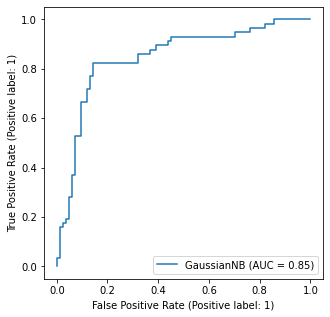

In [143]:
plt.rcParams['figure.figsize'] = [5, 5]
final_model = nb.GaussianNB()
final_model.fit(X_train,Y_train)
print(final_model.score(X_test,Y_test))
plot_roc_curve(final_model,X_test,Y_test)
print("Confusion Matrix -->")
print(confusion_matrix(Y_test,final_model.predict(X_test)))
print("Precision Score -->",precision_score(Y_test,final_model.predict(X_test)))
print("Recall Score -->",recall_score(Y_test,final_model.predict(X_test)))
print("F1-Score -->",f1_score(Y_test,final_model.predict(X_test)))

### 4).Perform 5 fold cross validation and summarize the results across the cross-validation sets. Compute the probability of the top class for each row in the testing dataset.

In [ ]:
kfold = KFold(5)
result = cvs(final_model,X,Y,cv=kfold)
print(result.mean())
Probabilities = final_model.predict_proba(X_test)
Topclass = []
for i in range(len(Probabilities)):
  Topclass.append(max(Probabilities[i][0],Probabilities[i][1]))
print(Topclass)

0.7773049645390071
[0.6565666270872464, 0.8247606552639025, 0.9944440392243018, 0.6712762613425918, 0.6829496444110631, 0.9480742053021054, 0.6878048716477105, 0.630080100197872, 0.6835222732803159, 0.9519152086762391, 0.9603695373402255, 0.9570389306778926, 0.7399428139121224, 0.8006676558289085, 0.9311613899318608, 0.9495846523110247, 0.9594792201380875, 0.6195061912015244, 0.772204549231858, 0.7063341496779793, 0.9499796410393468, 0.954877442067775, 0.9024989575517517, 0.9555510527107275, 0.6661866190104258, 0.9596058204486143, 0.9999999998720952, 0.6867414326942087, 0.9525530718396887, 0.9595485101659829, 0.6491739121109161, 0.9481151006266351, 0.9716521406284689, 0.6485990691890297, 0.8395764572683383, 0.7331076893292934, 0.9547891070589064, 0.6590149020907722, 0.6365265541315135, 0.9323514118346794, 0.9552476946917483, 0.9541151436480307, 0.6880826232416376, 0.9575674074566566, 0.6129553620997766, 0.9613860890385387, 0.6226909304461149, 0.950356468359846, 0.9307819807899156, 0.94

### 5) Make contour plots with the data points to visualize the class-conditional densities. What can you say about the assumption Naive Bayes model is based on from these plots? Explain in your report

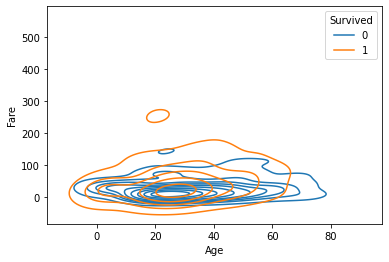

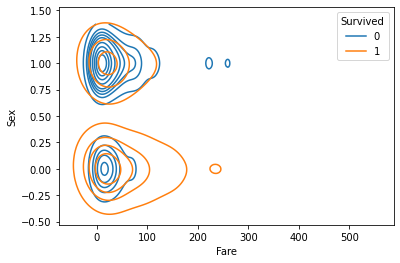

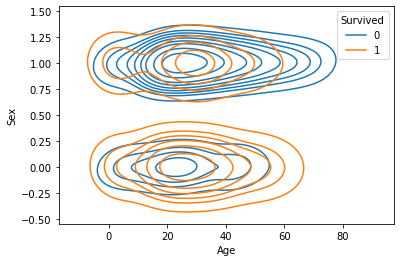

In [ ]:
sns.kdeplot(data = titanic_dataset,x="Age",y="Fare",hue="Survived")
X_new = titanic_dataset.copy()
X_new["Sex"] = lb_new.fit_transform(X_new["Sex"])
X_new["Embarked"] = lb_new.fit_transform(X_new["Embarked"])
plt.show()
sns.kdeplot(data = X_new,x="Fare",y="Sex",hue="Survived")
plt.show()
sns.kdeplot(data = X_new,x="Age",y="Sex",hue="Survived")

### 6) Compare your model with the Decision Tree classifier on the same dataset by performing 5-fold cross-validation and summarizing the results. Justify why one of them works better on this numeric dataset.

In [ ]:
model_DTC = DTC()
model_DTC.fit(X_train,Y_train)
kfold = KFold(5)
result_DTC =cvs(model_DTC,X,Y,cv=kfold)
print("Model_DTC score -->",result_DTC.mean())
print("Model_Gaussian score -->", result.mean())

Model_DTC score --> 0.7276595744680852
Model_Gaussian score --> 0.7773049645390071


## Problem 2


In [171]:
data = pd.read_csv("/content/drive/MyDrive/PRML/Lab3/dataset (1).csv")
dataf = pd.DataFrame(data = data)
X = dataf.copy()
Y = dataf["Y"]
X = X.drop("Y",axis = 1)
X = X.dropna()
X

,X0,X1,X2,X3,X4,X5,X6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


### 1) Use histogram to plot the distribution of samples

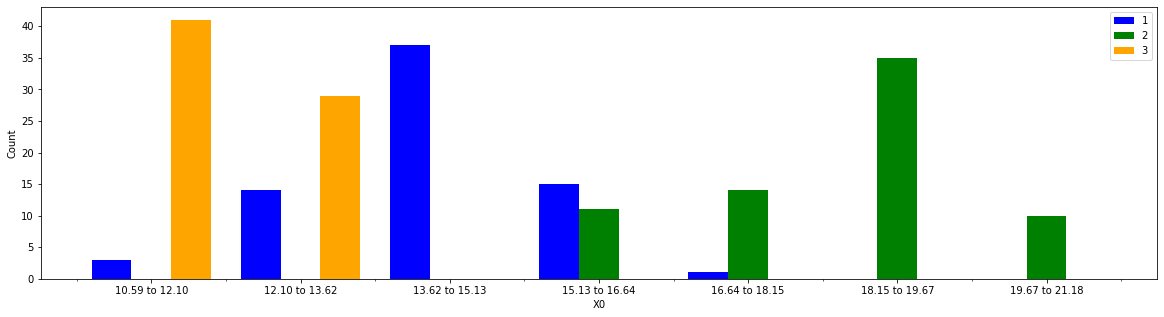

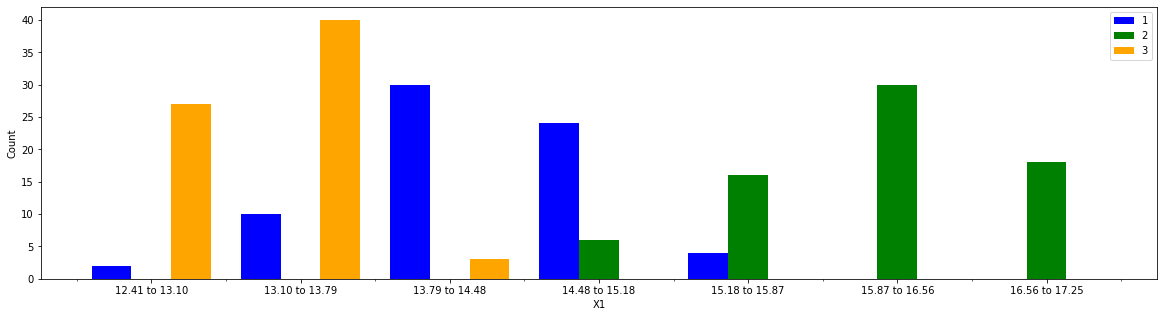

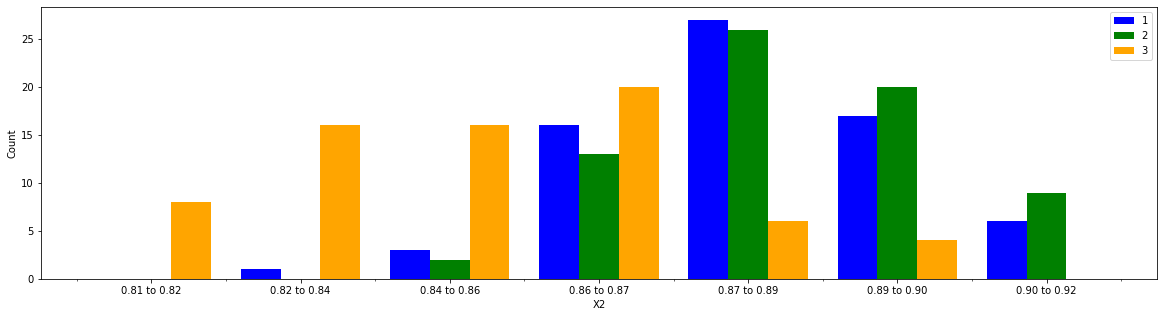

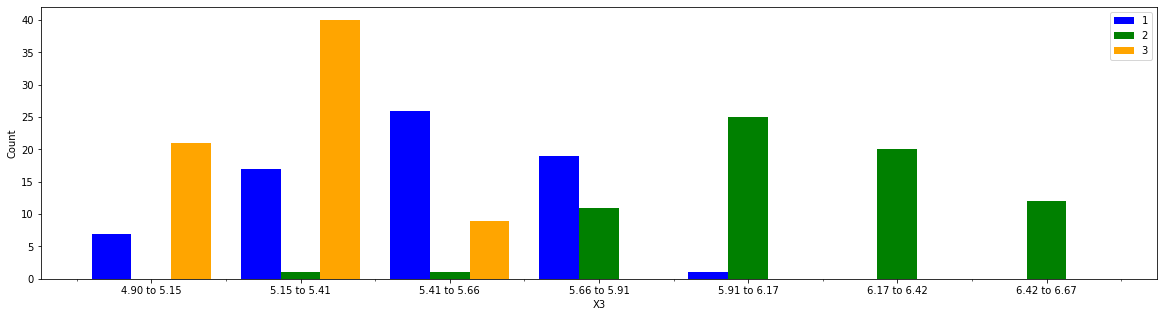

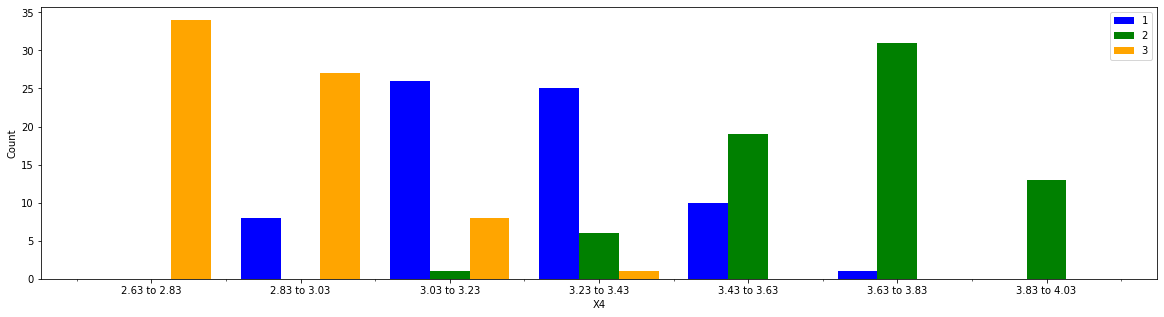

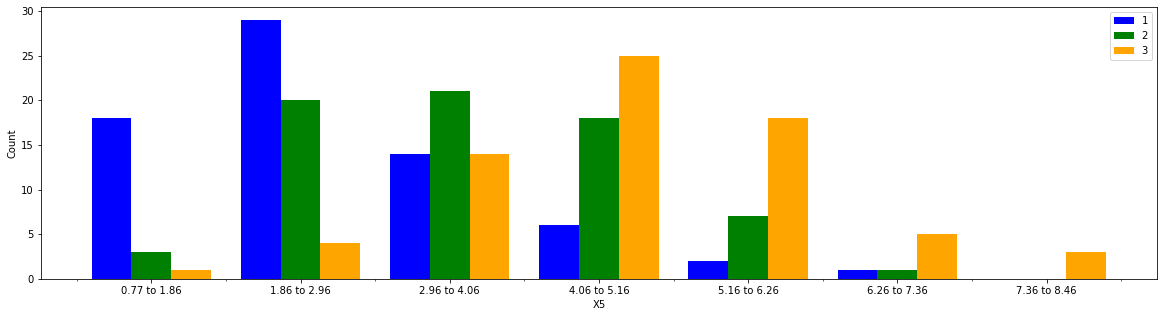

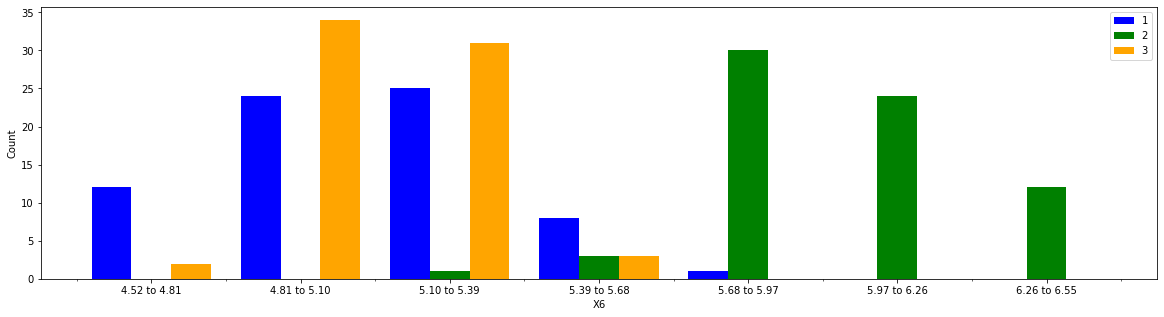

In [172]:
for i in X.columns:
  plt.rcParams['figure.figsize'] = [20, 5]
  x1 = list(dataf[dataf['Y'] == 1][i])
  x2 = list(dataf[dataf['Y'] == 2][i])
  x3 = list(dataf[dataf['Y'] == 3][i])

  colors=['blue', 'green', 'orange']
  names=['1', '2', '3']
  n,bins,patches=plt.hist([x1, x2, x3], color=colors, label=names,bins = 7, density=False)
  plt.legend()

  minor_locator = AutoMinorLocator(2)
  plt.gca().xaxis.set_minor_locator(minor_locator)
  plt.grid(which='minor', color='white', lw = 0.5)

  xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
  xticks_labels = [ "{:.2f} to {:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
  plt.xticks(xticks, labels = xticks_labels)
  plt.xlabel(i)
  plt.ylabel("Count")
  plt.show()
  print('\n','\n')

### 2) Determine the prior probability for all the classes. 

In [173]:
def Prior_Prob_classes():
  out = {}
  for i in range(1,4):
    x = np.count_nonzero(Y==i)/len(dataf["Y"])
    out[i] = x
  return out
Prior_Prob_classes()

{1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}

### 3) . Discretize the features into bins from scratch. Use of pandas, scikit learn and scipy is not allowed for this subpart.

In [174]:
dataf_new = dataf.copy()
def Make_bins(no_of_bins):
  for i in dataf_new.columns:
    min_val = dataf_new[i].min();
    max_val = dataf_new[i].max();
    diff = (max_val - min_val)/no_of_bins
    if(i == "Y"):
        continue;
    for j in range(len(dataf_new[i])):
      for k in range(1,no_of_bins + 1):
        if(dataf_new[i][j] <= min_val + diff*k):
          dataf_new[i][j] = k
          break;
Make_bins(7)
dataf_new = dataf_new.astype(int)
dataf_new

<ipython-input-174-8bbfa421bf2c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf_new[i][j] = k


,X0,X1,X2,X3,X4,X5,X6,Y
0,4,4,4,4,4,2,3,1
1,3,4,5,3,4,1,2,1
2,3,3,7,2,4,2,2,1
3,3,3,6,2,4,2,1,1
4,4,4,7,3,5,1,3,1
...,...,...,...,...,...,...,...,...
205,2,2,5,1,2,3,2,3
206,1,1,3,1,1,4,2,3
207,2,2,6,2,4,7,2,3
208,1,2,3,2,2,3,2,3


### 4) Determine the likelihood/class conditional probabilities for all the classes. 

In [175]:
def likelihood(feature,class_no,bin_no):
    index = np.where(dataf_new["Y"]==class_no)
    cnt= len(dataf_new[(dataf_new['Y']==class_no)&(dataf_new[feature]==bin_no)].index)
    prob = cnt/len(index[0])
    return prob;
def likelihood_of_paricular_feature(feature,no_bins,class_no):
      d   = {}
      for j in range(1,no_bins+1):
        d[j] = likelihood(feature,class_no,j)
      return d

def probabiblity_of_class():
    for i in range(1,4):
        for  j in dataf_new.columns:
          if(j=="Y"):
            continue;
          else:
            d = likelihood_of_paricular_feature(j,7,i)
            print("Class",i,j)
            print(d)
probabiblity_of_class()

Class 1 X0
{1: 0.04285714285714286, 2: 0.2, 3: 0.5285714285714286, 4: 0.21428571428571427, 5: 0.014285714285714285, 6: 0.0, 7: 0.0}
Class 1 X1
{1: 0.02857142857142857, 2: 0.14285714285714285, 3: 0.42857142857142855, 4: 0.34285714285714286, 5: 0.05714285714285714, 6: 0.0, 7: 0.0}
Class 1 X2
{1: 0.0, 2: 0.014285714285714285, 3: 0.04285714285714286, 4: 0.22857142857142856, 5: 0.38571428571428573, 6: 0.24285714285714285, 7: 0.08571428571428572}
Class 1 X3
{1: 0.1, 2: 0.24285714285714285, 3: 0.37142857142857144, 4: 0.2714285714285714, 5: 0.014285714285714285, 6: 0.0, 7: 0.0}
Class 1 X4
{1: 0.0, 2: 0.11428571428571428, 3: 0.37142857142857144, 4: 0.35714285714285715, 5: 0.14285714285714285, 6: 0.014285714285714285, 7: 0.0}
Class 1 X5
{1: 0.2571428571428571, 2: 0.4142857142857143, 3: 0.2, 4: 0.08571428571428572, 5: 0.02857142857142857, 6: 0.014285714285714285, 7: 0.0}
Class 1 X6
{1: 0.17142857142857143, 2: 0.34285714285714286, 3: 0.35714285714285715, 4: 0.11428571428571428, 5: 0.01428571428571

### 5)  Plot the count of each unique element for each class. Compare the plot with the plot of distribution.

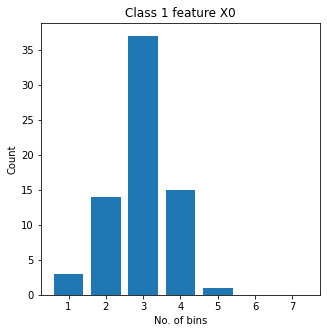

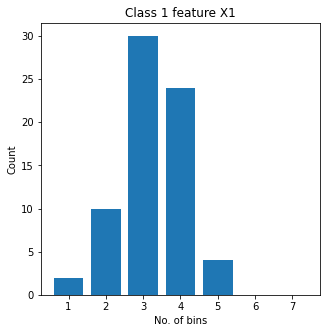

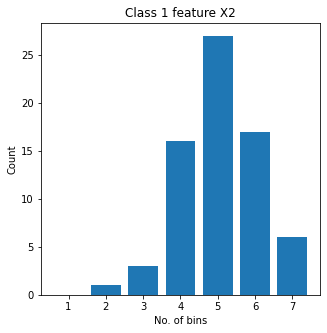

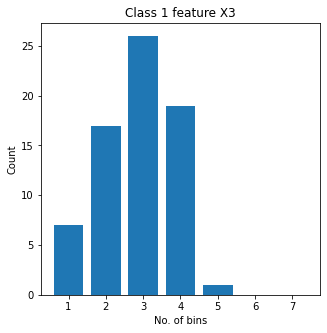

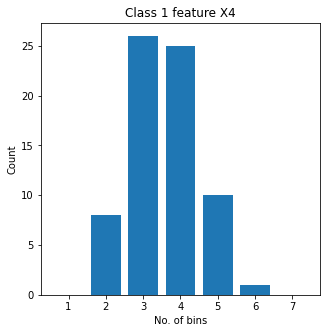

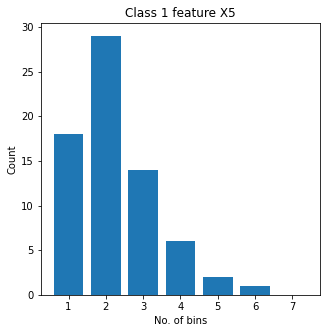

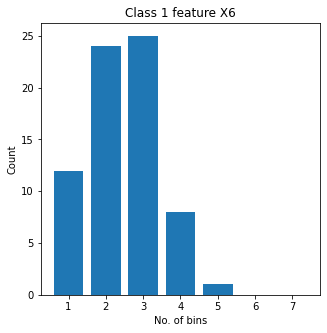

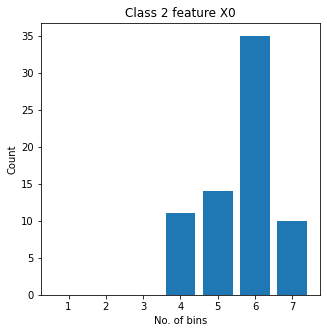

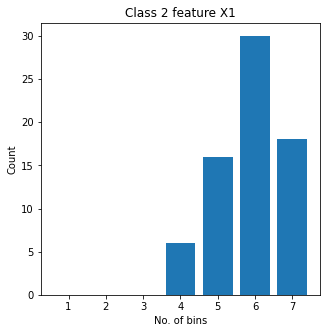

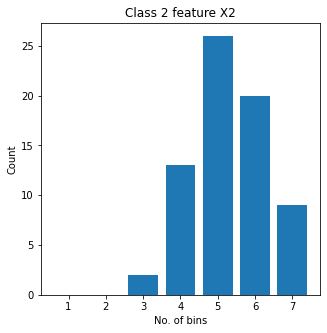

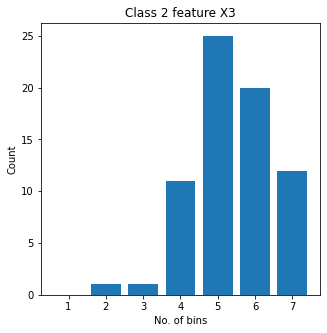

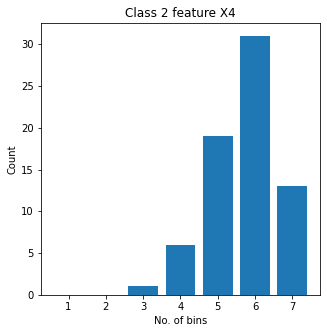

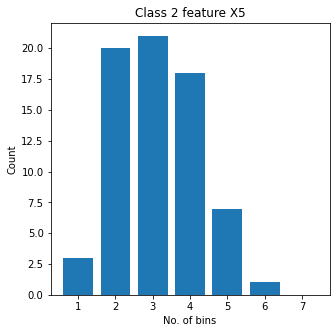

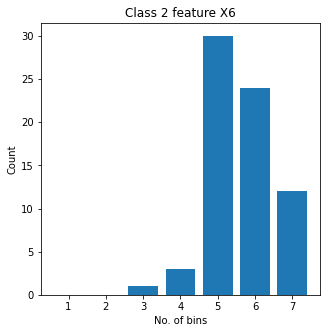

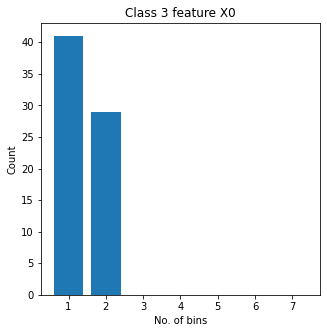

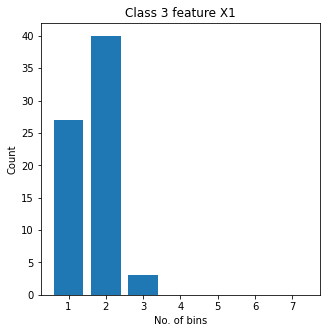

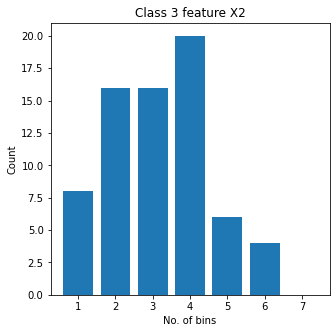

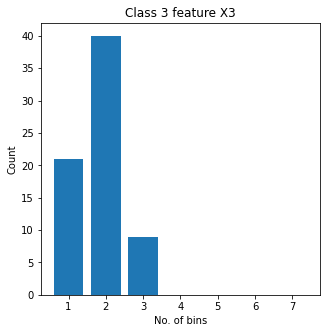

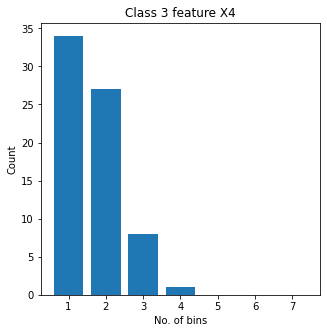

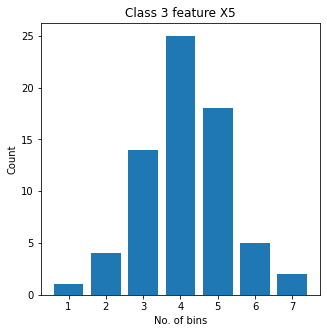

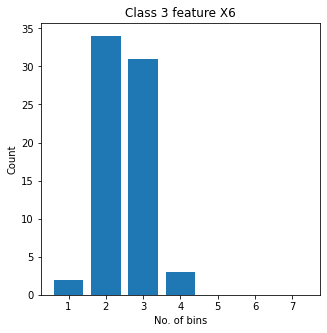

In [176]:
plt.rcParams['figure.figsize'] = [5, 5]

for i in range(1,4):
  no_bins = [1,2,3,4,5,6,7]
  for k in dataf_new.columns:
    XY = []
    if(k=='Y'):
      continue
    else:
      for j in no_bins:
        cnt = len(dataf_new[(dataf_new['Y']==i)&(dataf_new[k]==j)].index)
        XY.append(cnt)
      # plt.subplot(3,3,7)
      plt.bar(no_bins,XY)
      plt.title("Class " + str(i)+" "+"feature " + k)
      plt.xlabel("No. of bins")
      plt.ylabel("Count")
      plt.show()

### 6) Calculate the posterior probabilities and plot them in a single graph. Analyze the plot

In [177]:
X_2 = dataf_new.copy()
Y_2 = dataf_new["Y"]
# X_2 = X_2.drop("Y",axis = 1)
X_2_train,X_2_test,Y_2_train,Y_2_test = tts(X_2,Y_2,test_size=0.2,shuffle=True)  
print(Y_2_train.shape,Y_2_test.shape)   

(168,) (42,)


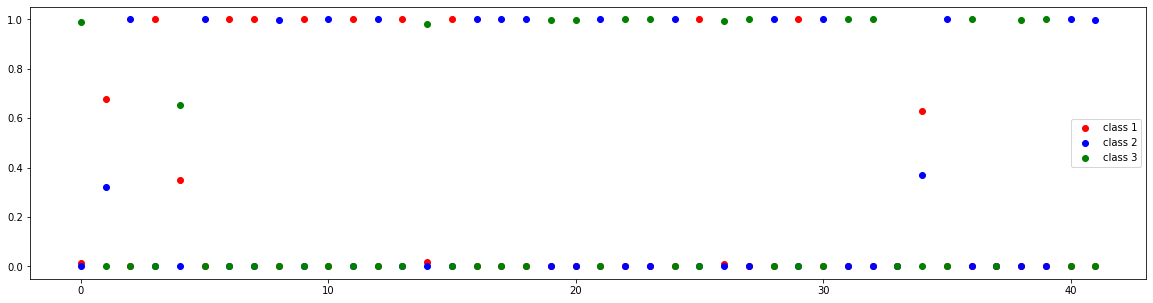

In [178]:
plt.rcParams['figure.figsize'] = [20, 5]
def newlikelihood(feature,class_no,bin_no,dataset):
    index = np.where(dataset["Y"]==class_no)
    cnt= len(dataset[(dataset['Y']==class_no)&(dataset[feature]==bin_no)].index)
    if(cnt == 0):
      prob = 0
    else:
      prob = cnt/len(index[0])
    return prob;
def posterior_prob_likelihood(class_no,sample):
  prob = 1;
  for i in range(7):
    # if(i=="Y"):
    #   x = 1;
    # else:
      prob *= newlikelihood(X_2_train.columns[i],class_no,sample[i],X_2_train)
  out =Prior_Prob_classes()
  prob *= (out[class_no])
  return prob;
def probabilities():
  x_axis = []
  out1 = []
  out2 = []
  out3 = []
  for i in range(len(X_2_test.index)):
    x_axis.append(i)
  for j in X_2_test.index:
      for k in range(1,4):
        if(k==1):
          out1.append(posterior_prob_likelihood(k,X_2_test.loc[j]))
        elif(k==2):
          out2.append(posterior_prob_likelihood(k,X_2_test.loc[j]))
        elif(k==3):
          out3.append(posterior_prob_likelihood(k,X_2_test.loc[j]))
  for i in range(len(out1)):
    s = out1[i] + out2[i] + out3[i]
    if(s != 0):
      out1[i] = out1[i]/s
      out2[i] = out2[i]/s
      out3[i] = out3[i]/s
  # print(out1)
  # print(out2)
  # print(out3)
  plt.scatter(x_axis, out1, color='r', label='class 1')
  plt.scatter(x_axis, out2, color='b', label='class 2')
  plt.scatter(x_axis, out3, color='g', label='class 3')
  plt.legend()
  plt.show()

probabilities()